# Importing Libraries

In [1]:
import numpy as np
from numpy.random import normal
import matplotlib.pyplot as plt
import math

#Problem 1 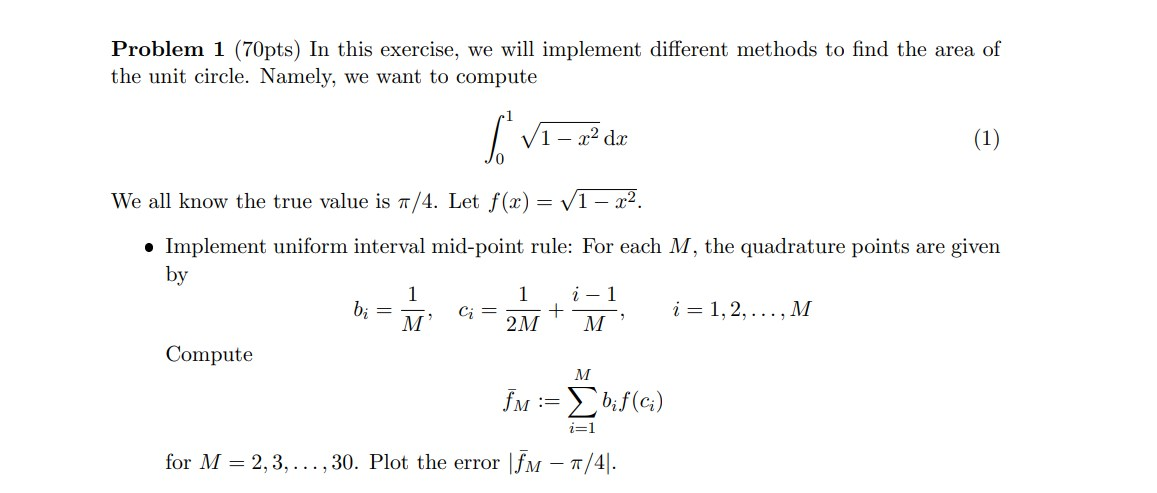

In [2]:
def UniformMidpointRule(last_M: int,interval: int) -> tuple:
    """
    Get the f_m_bar approximation for every M number of points
    @param: last_M: Total Quadrature Point Count till which approximation has to be generated at regular interval starting from 10 Points
    @param: interval: M has to be chosen per this param interval
    """
    # List of number of Quadrature points to generate function approximation on
    M = np.arange(2,last_M+1,interval)
    f_m_unif = []

    # Generating approximate function for m number of Quadrature points
    for m in M:
        sum = 0
        # Calculating the f_m for every M value
        for i in range(1,m+1):
            b_i = float(1/m)
            c_i = float((1/(2*m)) + ((i-1)/(m)))
            sum += float(b_i*np.sqrt(1-(c_i)**2))
        # f_M
        f_m_unif.append(sum)
    f_m_unif = np.array(f_m_unif)

    #f_m3_uni_midpoint = f_m_unif[2] # To compare with the 2nd question

    return M,f_m_unif

In [3]:
def UniformMidpointPlot(last_M:int,interval:int, err_plot: bool)-> None:
    """
    Generate the plot for Uniform Interval midpoint rule quadrature points
    @param: last_M: Total Quadrature Point Count till which approximation has to be generated at regular interval starting from 10 Points
    @param: interval: M has to be chosen per this param interval
    @param: err_plot: To Generate error plot or not for function approximation produced at m quadrature points
    """

    # Obtaining the Quadrature points and Respective function approximation via use of uniform midpoint rule
    M,f_MC = UniformMidpointRule(last_M,interval)
    error = f_MC-(np.pi/4)

    # Subplots
    fig,axs= plt.subplots(2,1,figsize= (20,12))

    # Sub Plot 1
    # Plotting the line
    axs[0].plot(M,f_MC, label='Line')
    # Plotting the points
    axs[0].scatter(M,f_MC, color='red')
    # Plotting the pi/4 line
    axs[0].axhline(y=(np.pi)/4, color='purple', linestyle='-', linewidth=1, label = 'pi/4')
    # Adding labels and title
    axs[0].set_xlabel("Number of Quadrature Points")
    axs[0].set_ylabel("Integral Approximation for M points")
    axs[0].set_title('Integral approximation with Uniform Interval Midpoint rule')
    # Adding legend
    axs[0].legend()

    if err_plot:
        axs[1].plot(M,error, label = 'approximation_error')
        axs[1].scatter(M,error)
        axs[1].set_xlabel("Number of Quadrature Points M")
        axs[1].set_ylabel("Error for M points")
        axs[1].set_title("Uniform Interval Midpoint Rule Simulation Errors")
        axs[1].legend()
    # Display the plot
    plt.show()

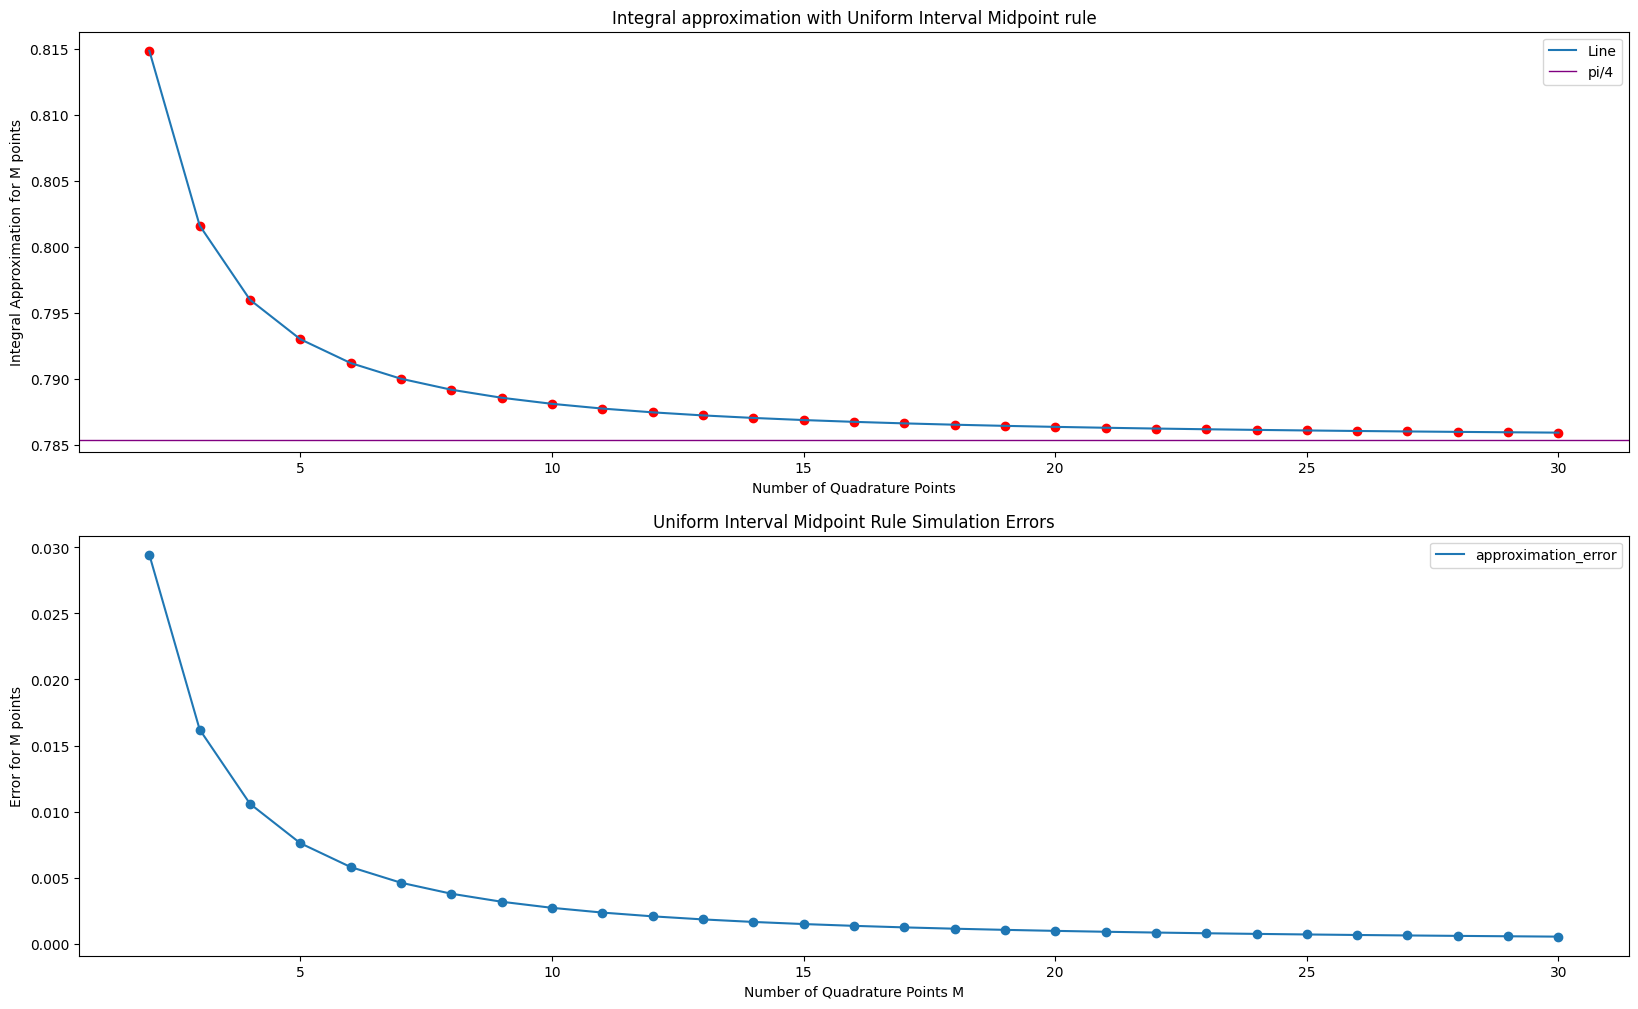

In [4]:
# Simulating the Approximations
UniformMidpointPlot(last_M = 30,interval = 1,err_plot = True)

#### Observations for Problem 1.1
- The error goes down as we increase the quadrature points

#Problem 1.2 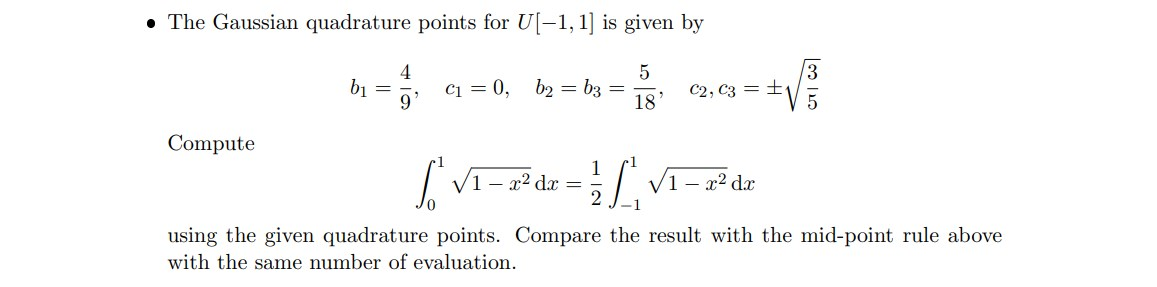

In [5]:
b_i =  np.array([4/9,5/18,5/18])
c_i = np.array([0,np.sqrt(3/5),-1 * np.sqrt(3/5)])

f_m_gauss = []
for m in range(1,4):
    approximation = 0
    for j in range(0,m):
        approximation += b_i[j]*np.sqrt(1-(c_i[j]**2))
    f_m_gauss.append(approximation)

_, f_m_unif = UniformMidpointRule(last_M=30,interval=1)

f_m_gauss = np.array(f_m_gauss)

print(f"Errors with Midpoint Rule:  {f_m_unif[:3] - np.pi/4}")
print(f"Errors with Gauss Rule      {f_m_gauss - np.pi/4}")
print()
print("Approximation of the integral with M=3 equidistant nodes:", f_m_unif[1])
print("Approximation of the integral with M=3 Gauss quadrature points:", f_m_gauss[-1])
print("Real value of the integral:", math.pi/4)

Errors with Midpoint Rule:  [0.02944367 0.016205   0.01058414]
Errors with Gauss Rule      [-0.34095372 -0.16527163  0.01041047]

Approximation of the integral with M=3 equidistant nodes: 0.8016031664534248
Approximation of the integral with M=3 Gauss quadrature points: 0.7958086289075976
Real value of the integral: 0.7853981633974483


#### Observations for Problem 1.2
- We see that at the same number of quadrature points (here 3) we get a better approximation with Gauss quadrature rule.
- Another observation that can be made with Gauss approach the solution converges faster

This is because:

3) We consider $M$ realizations, $R=\{(x_i,y_i)\}_{i=1}^M$, of $(X,Y)\sim U([0,1]\times[0,1])$ and then: </br>
$I\approx \frac{\mid\{(x_i,y_i)\in R \ s.t \ x_i^2+y_i^2\leq 1 \}\mid}{M}=:\bar{f}_{MC}$. </br>
This because $I$ is the area of the unit circle, which in random terms is the probability of the event $\{(X,Y)\in\{(x,y)\in\mathbb{R}^2 \ s.t \ x^2+y^2\leq 1\}\}$ that we approximate considering uniform probability.

#Problem 1.3 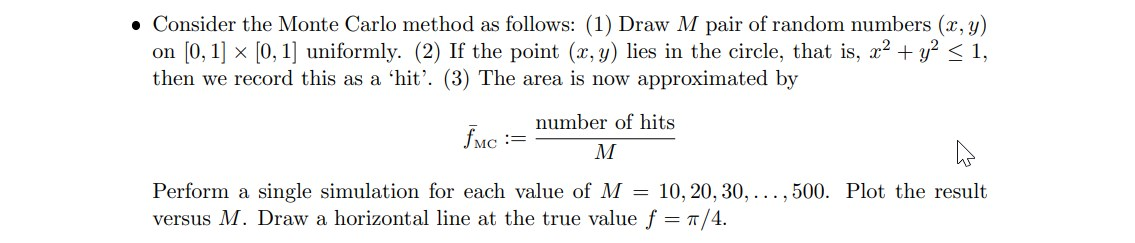

In [6]:
def AreaApprox(M: int)-> float:
    '''
    Generate Circle area approximation for M quadrature points
    @param: M: Count of Quadrature points
    '''
    ## Drawing a pair of random numbers
    x = np.random.uniform(size = M)
    y = np.random.uniform(size = M)

    hits = 0
    ## Seeing how many points lie in the circle
    for iterate in range(M):

        if (x[iterate]**2 + y[iterate]**2 <=1):
            hits += 1

    ## Returning the area approximation for M points
    return hits/M

def MonteCarloRule(last_M:int,interval:int)-> tuple:
    """
    Get the f_m_bar approximation for given M points via MonteCarlo Rule
    @param: last_M: Total Quadrature Point Count till which approximation has to be generated at regular interval starting from 10 Points
    @param: interval: M has to be chosen per this param interval
    """
    ## List of number of Quadrature points to generate function approximation on
    M = list(range(10,last_M+1,interval))

    ## Getting area approximations for different values of M
    f_MC = np.array([AreaApprox(m) for m in M])

    return M,f_MC

def MonteCarloPlot(last_m: int,interval: int,err_plot: bool)-> None:
    """
    Get the f_m_bar approximation and error plot for given M points via MonteCarlo Rule
    @param: last_M: Total Quadrature Point Count till which approximation has to be generated at regular interval starting from 10 Points
    @param: interval: M has to be chosen per this param interval
    @param: err_plot: Whether to generate error plot or not
    """
    # Obtaining the Quadrature points and Respective function approximation via use of uniform midpoint rule
    M,f_MC = MonteCarloRule(last_m,interval)

    ## Generating Subplots for Approximation and Errors
    fig,axs = plt.subplots(2,1,figsize= (20,12))
    ## Generating the plot
    axs[0].plot(M,f_MC, label = 'f_MC')
    axs[0].scatter(M,f_MC)

    # Plot lines at pi/4
    axs[0].axhline(y=(np.pi)/4, color='purple', linestyle='-', linewidth=1, label = 'pi/4')

    ## Adding visual information
    axs[0].set_xlabel("Number of Quadrature Points M")
    axs[0].set_ylabel("Integral Approximation for M points")
    axs[0].set_title("Monte Carlo Method Simulation")
    axs[0].legend()

    if err_plot:
        err = f_MC - np.pi/4
        axs[1].plot(M,err, label = 'approximation_error')
        axs[1].scatter(M,err)
        axs[1].set_xlabel("Number of Quadrature Points M")
        axs[1].set_ylabel("Error for M points")
        axs[1].set_title("Monte Carlo Method Simulation Errors")
        axs[1].legend()


    plt.show()

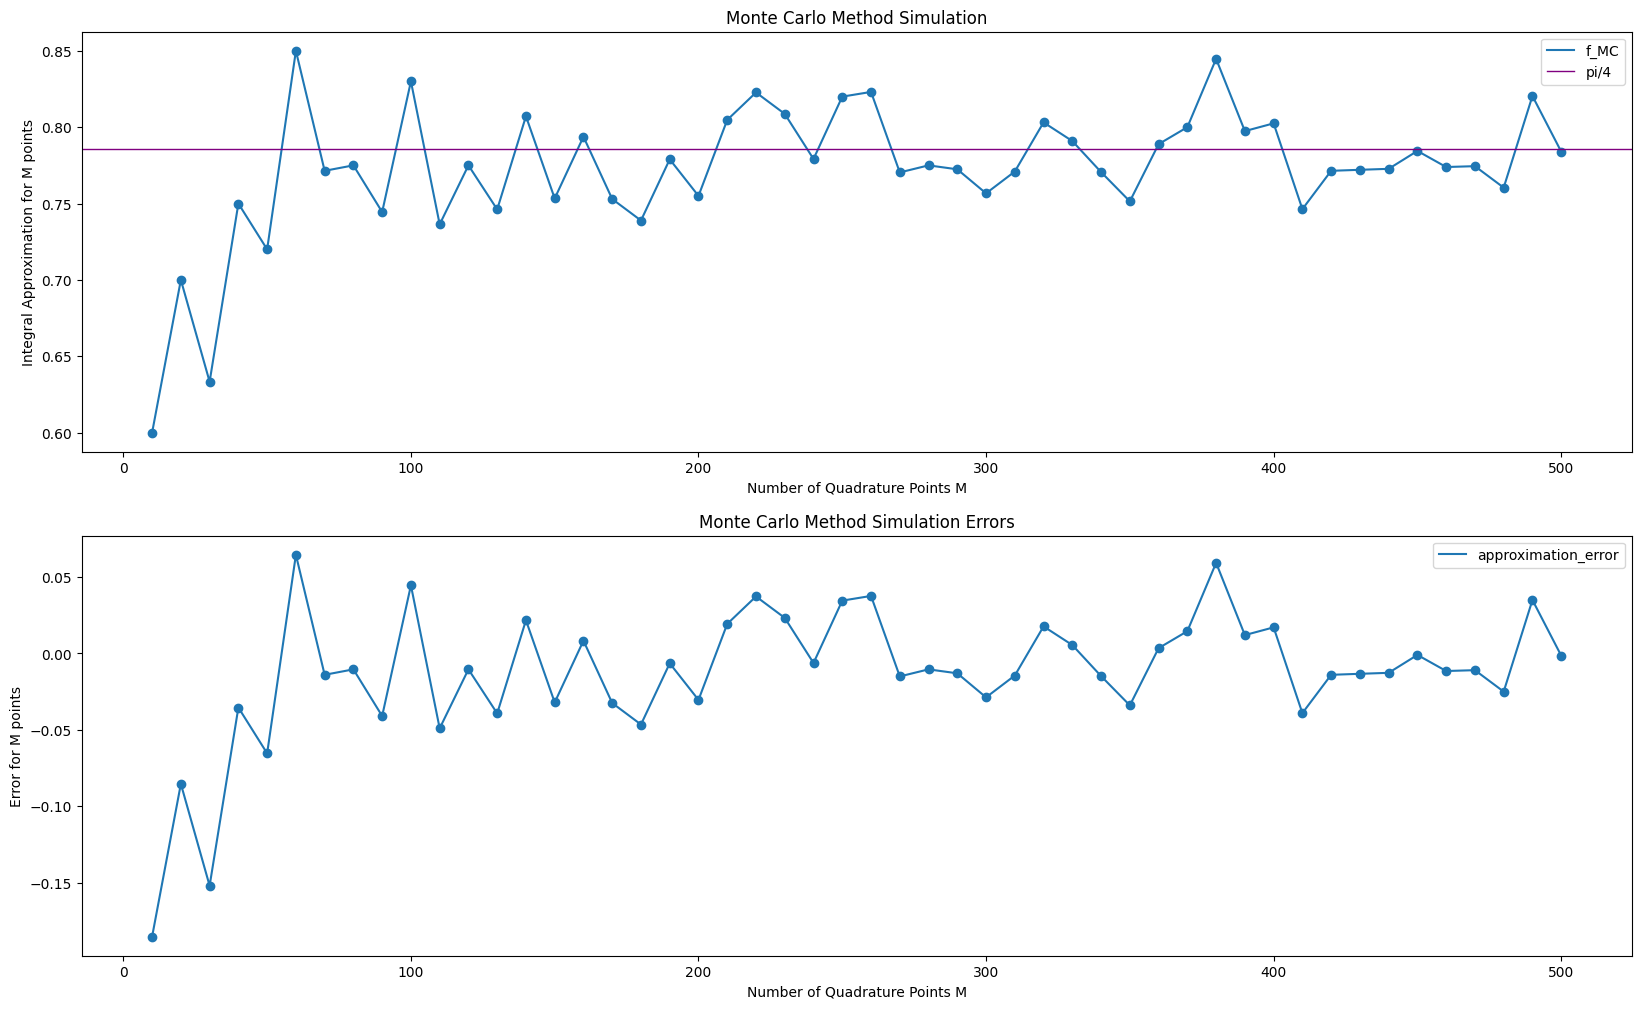

In [7]:
# Simulating the Approximations
interval = 10
f_MC = MonteCarloPlot(last_m = 500,interval = interval,err_plot = True)

#### Observations for Problem 1.3
- The error decreases as we increase the number of samples for the approximation

#Problem 1.4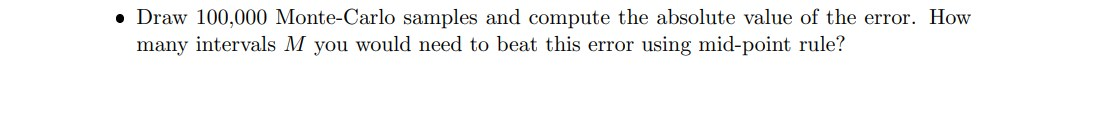

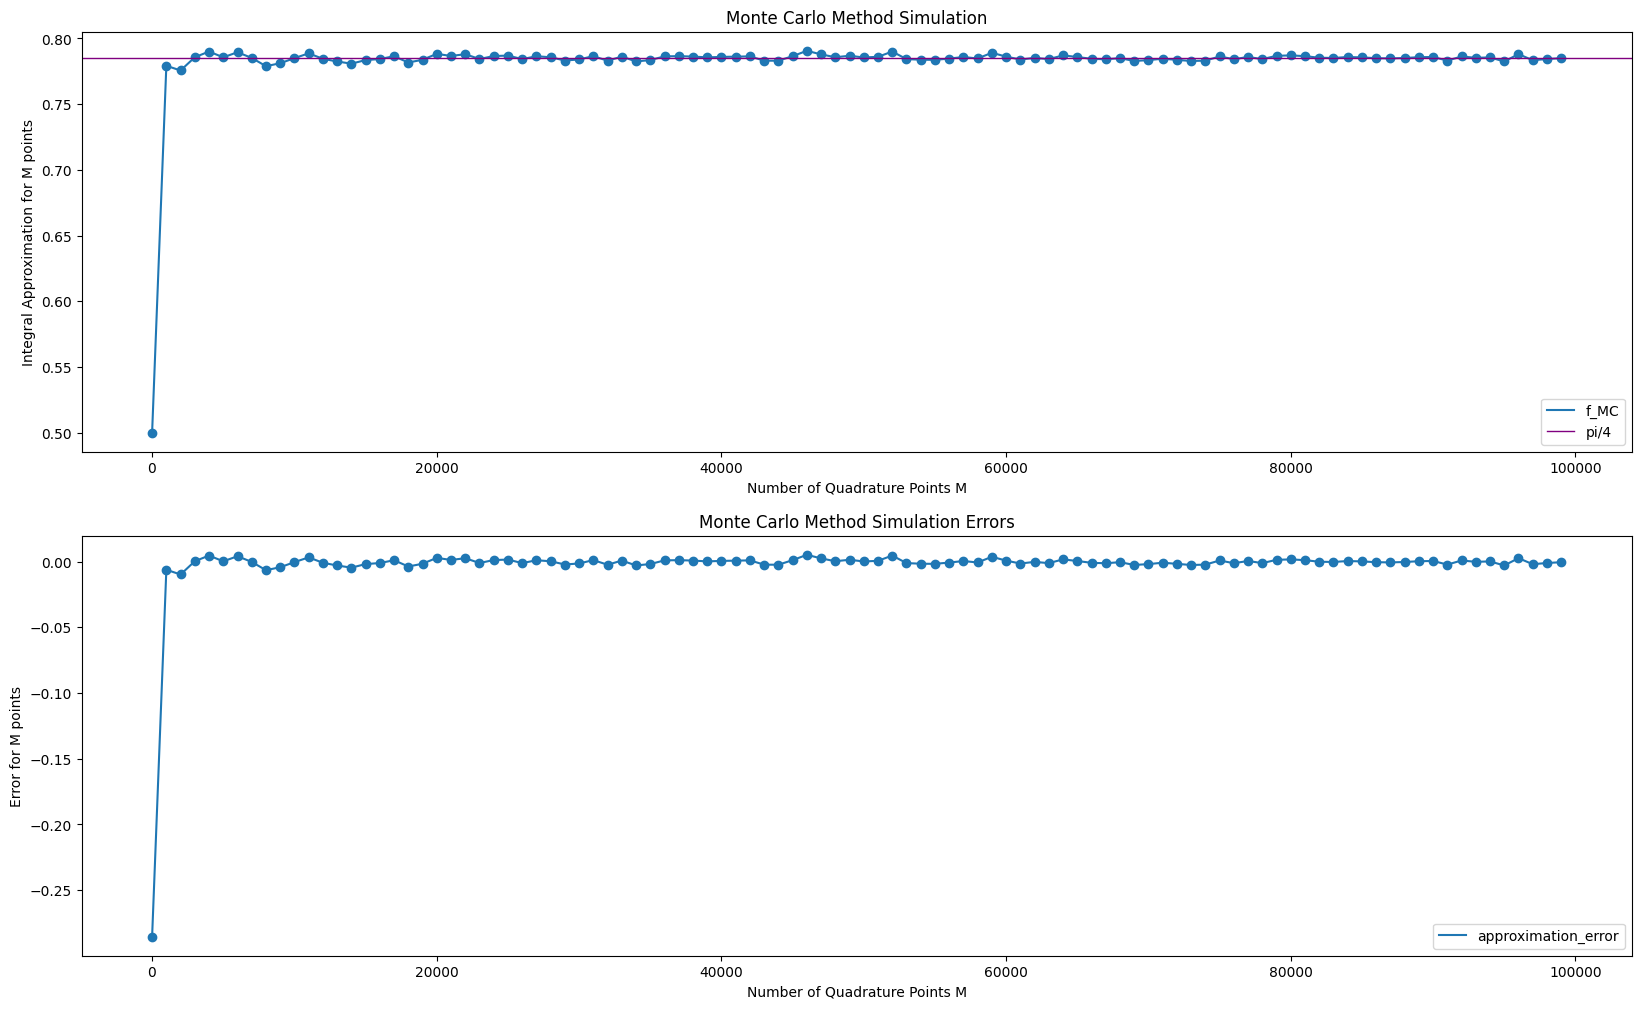

In [8]:
interval = 1000
MonteCarloPlot(last_m = int(1e5),interval = interval,err_plot = True)

In [9]:
interval = 100
M_c, f_MC = MonteCarloRule(last_M = int(1e5),interval = interval)
M_u, f_uniform = UniformMidpointRule(last_M = int(1e5),interval = interval)

In [10]:
mc_abs_error = f_MC[-1] - np.pi/4
for i,approximation in enumerate(f_uniform):
    err = approximation-np.pi/4
    if err<np.abs(mc_abs_error):
        print(f"Midpoint method attains convergence with mc_abs_error for 1e5 points after {M_u[i]} quadrature point")
        break

Midpoint method attains convergence with mc_abs_error for 1e5 points after 102 quadrature point


#### Observations for Problem 1.4
- Convergence for midpoint rule is achieved faster as compared to monte carlo, we can get same error as of MC method with approx 100 quadrature points.

# Problem 2

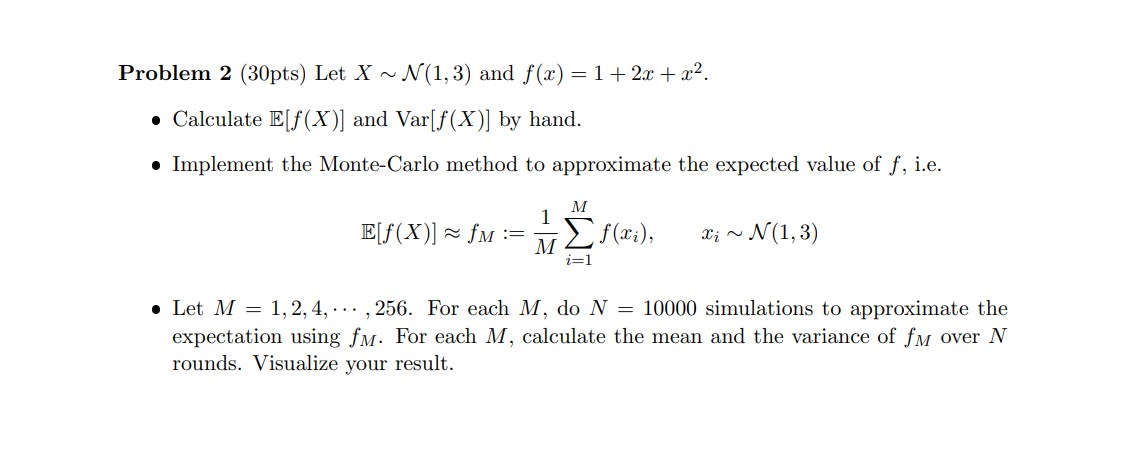

1) Let be $X\sim N(1,3)$ and $f(X)=1+2X+X^2$. <br>
<br>
Expectation: <br>
$E[f(X)]=E[1+2X+X^2]=1+2E[X]+E[X^2]=1+2+4=7,$ <br>
where we have used linearity of expectation + $E[X^2]=V[X]+E[X]^2=3+1=4$. <br>
<br>
Variance: <br>
We first observe that $\frac{(X-1)^2}{3}\sim \chi^2(1)$ $\left(V[\chi^2(1)]=2\right)$ and we rewrite $f(X)=(X-1)^2+4X$, then: <br>
\begin{align*}
V[f(X)]&=V[(X-1)^2\frac{3}{3}]+16V[X]+2Cov[(X-1)^2,4X]=\\
&=9V[\chi^2(1)]+16*3+8(Cov[X,X^2]+Cov[X,1]-2V[X])=\\
&=9*2+16*3+8(E[X^3]-E[X]E[X^2]-2*3)=18+16*3-8*(10-4-6)=66,
\end{align*}
where the third moment of $X$, given that $X-1\sim N(0,3)$ (then every odd moment is 0 due to density's symmetry), was computed this way: <br>
$E[(X-1)^3]=0 \iff E[X^3]=3E[X^2]-3E[X]+1=10$

2) We approximate $E[f(X)]$ using MC method:
\begin{align*}
E[f(X)]\approx \frac{1}{M}\sum_{i=1}^M f(x_i)=:\bar{f}_M,
\end{align*}
where $x_i\sim N(1,3)$ and $M\in\{1,2,4,\dots,256\}$.

Let M = 1,2,4,··· ,256. For each M, do N = 10000 simulations to approximate the expectation using fM. For each M, calculate the mean and the variance of fM over N rounds. Visualize your result.

In [11]:
def f2(x: float)-> float:
    return 1 + 2*x + x**2

def empirical_mean(f_M: np.array)->float:
    return np.mean(f_M)

def empirical_variance(f_M: np.array,N: int)->float:
    return (1/(N-1))*np.sum((f_M-np.mean(f_M))**2) #unbiased estimator of the variance, S_N^2

In [12]:
mu: float=1
sigma: float=math.sqrt(3) #standard deviation
N: int=10000
f_M: np.array=np.zeros((128,N)) #i-th row contains the N simulations of f_M for M=i*2 (except for i=0 when M is 1)
count=0

for M in range(1,257,2):
    samples=[np.random.normal(mu,sigma,M) for _ in range(N)]
    f_M[count]=[(1/M)*np.sum(f2(samp)) for samp in samples]
    count+=1

Computing empirical mean and variance of MC estimator of 
E[f(X)] for each M and visualizing the results:

In [13]:
empirical_means=[empirical_mean(f_M[j]) for j in range(128)]
empirical_variances=[empirical_variance(f_M[k],N) for k in range(128)]
true_variance = [66/k for k in range(1,129)]

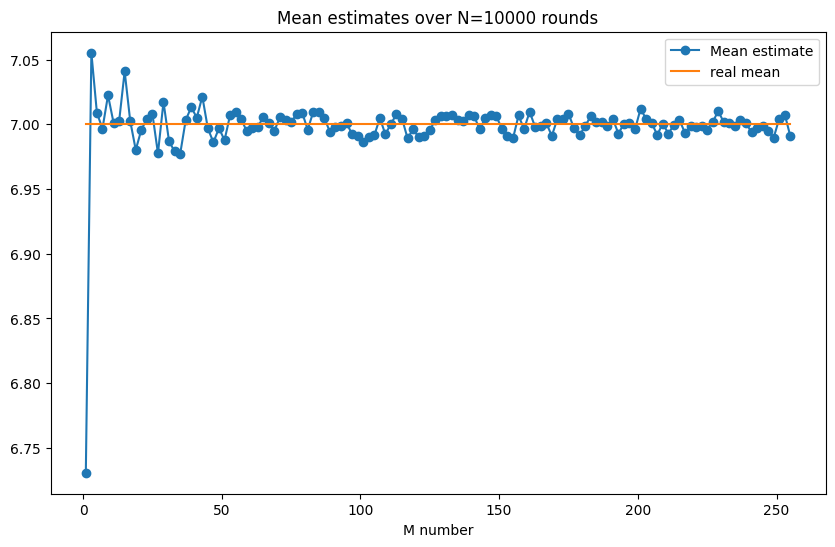

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(1,257,2),empirical_means, label="Mean estimate", marker='o')
plt.plot(range(1,257,2), np.array([7]*128), label="real mean")
plt.legend(loc='best')
plt.title("Mean estimates over N=10000 rounds")
plt.xlabel("M number")

We see that when $M$ increases the mean of $f_M$ is correctly close to the real value of $E[f(X)]$ (we know that the MC estimator, the sample mean, converges to the mean almost surely by LLN).

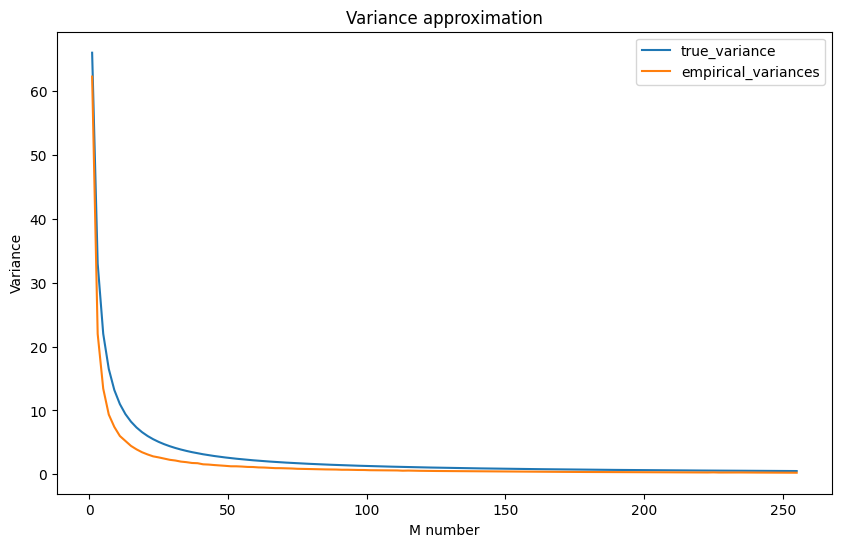

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,257,2), true_variance, label = 'true_variance')
plt.plot(range(1,257,2), empirical_variances, label = 'empirical_variances')
plt.title('Variance approximation')
plt.xlabel("M number")
plt.ylabel("Variance")
plt.legend()
plt.show()

The variance of $\bar{f}_M$, is $\frac{\sigma^2}{M}$ ($\sigma^2=V[f(X)]$), then we notice that its estimate correctly goes to 0 when $M$ increases and it's correctly close to the real variance. Moreover, since the sample mean, $\bar{f}_M$, is unbiased, the variance is equal to the MSE: $E[(\bar{f}_M-E[f(X)])^2]$. 